In [1]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import os
from osgeo import gdal

In [2]:
fp_in='input/'
fp_out='output/'

fn_blue=r"T33UVR_20240514T100031_B02"
fn_green=r"T33UVR_20240514T100031_B03"
fn_red=r"T33UVR_20240514T100031_B04"

In [3]:
bandList = [band for band in os.listdir(fp_in) if band[-4:]=='.jp2']
for band in bandList:
    in_image = gdal.Open(fp_in+band)
    driver = gdal.GetDriverByName("GTiff")
    fp_tif = fp_in+band[:-4]+'.tif'
    out_image = driver.CreateCopy(fp_tif, in_image, 0)
    in_image = None
    out_image = None  

C:\Users\may10489\AppData\Local\ESRI\conda\envs\pro_dl_env_apr24\Lib\site-packages\osgeo\gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


In [3]:
band_02=rasterio.open(fp_in+fn_blue+'.tif')
band_03=rasterio.open(fp_in+fn_green+'.tif')
band_04=rasterio.open(fp_in+fn_red+'.tif')

In [4]:
red = band_04.read(1)
green = band_03.read(1)
blue = band_02.read(1)

In [ ]:
plt.imshow(red)

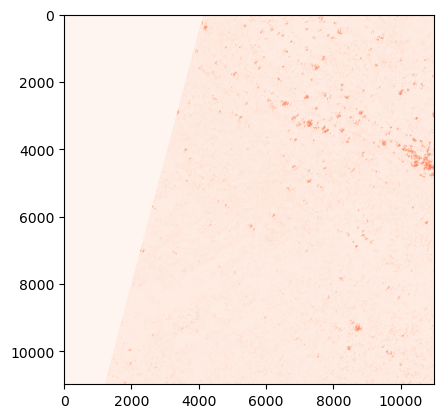

In [21]:
plt.imshow(red, cmap='Reds')


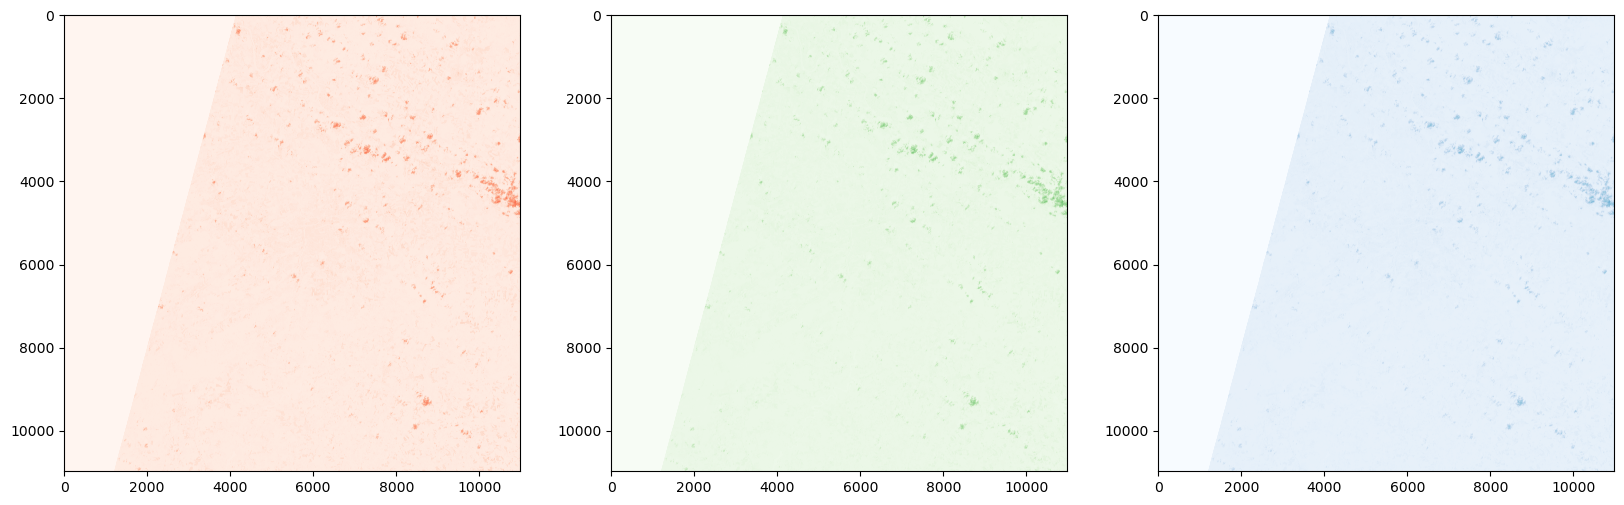

In [22]:
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(red, cmap='Reds')
ax1 = fig.add_subplot(1,3,2)
ax1.imshow(green, cmap='Greens')
ax1 = fig.add_subplot(1,3,3)
ax1.imshow(blue, cmap='Blues')

In [5]:
rgb_composite_raw= np.dstack((red, green, blue))
rgb_composite_raw.shape

(10980, 10980, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


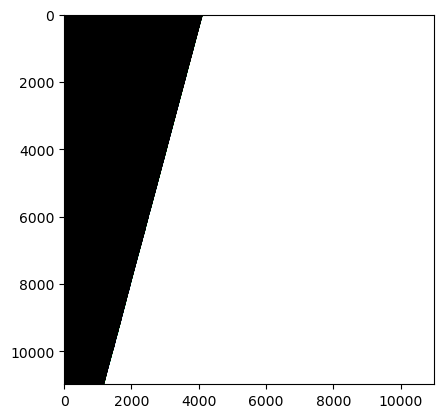

In [7]:
plt.imshow(rgb_composite_raw)


In [25]:
red.max()

23917

In [26]:
red.min()

0

In [6]:
def normalize(band):
    band_min, band_max = (band.min(), band.max())
    return ((band-band_min)/((band_max - band_min)))

red_n = normalize(red)
green_n = normalize(green)
blue_n = normalize(blue)

In [10]:
red_n.max()


1.0

In [11]:
red_n.min()


0.0

In [8]:
red_n_uint8 = red_n.astype(np.uint8)
green_n_uint8 = green_n.astype(np.uint8)
blue_n_uint8 = blue_n.astype(np.uint8)

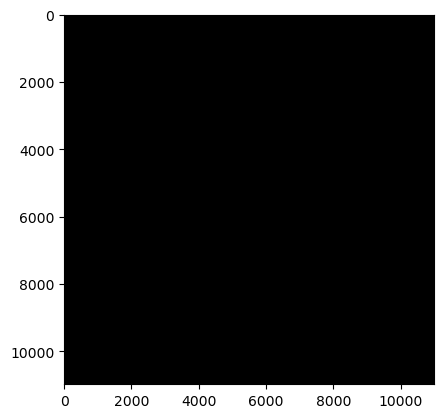

In [9]:
rgb_composite_n= np.dstack((red_n_uint8, green_n_uint8, blue_n_uint8))
plt.imshow(rgb_composite_n)

In [7]:
import cv2

# Define desired resize factor (e.g., half the original size)
resize_factor = 0.5

# Resize each band using OpenCV
red_resized = cv2.resize(red_n, None, fx=resize_factor, fy=resize_factor, interpolation=cv2.INTER_AREA)
green_resized = cv2.resize(green_n, None, fx=resize_factor, fy=resize_factor, interpolation=cv2.INTER_AREA)
blue_resized = cv2.resize(blue_n, None, fx=resize_factor, fy=resize_factor, interpolation=cv2.INTER_AREA)

# Create RGB composite with resized bands
rgb_composite_n = np.dstack((red_resized, green_resized, blue_resized))

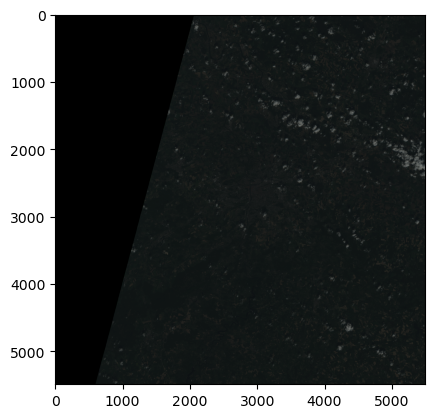

In [8]:
plt.imshow(rgb_composite_n)

In [9]:
def brighten(band):
    alpha=0.13
    beta=0
    return np.clip(alpha*band+beta, 0,255)

red_b=brighten(red_resized)
blue_b=brighten(blue_resized)
green_b=brighten(green_resized)

red_bn = normalize(red_b)
green_bn = normalize(green_b)
blue_bn = normalize(blue_b)

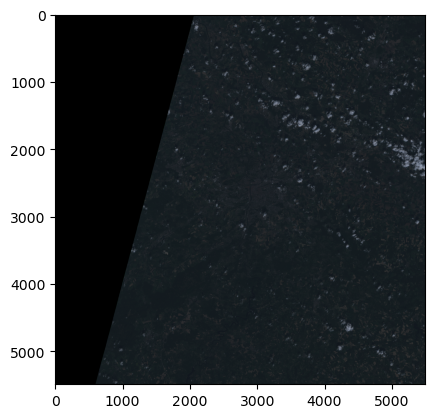

In [10]:
rgb_composite_bn= np.dstack((red_bn, green_bn, blue_bn))
plt.imshow(rgb_composite_bn)

In [11]:
rgb_plot=plt.imshow(rgb_composite_bn, interpolation='lanczos')
plt.axis('off')
plt.savefig(fp_out+'tihany_rgb_composite.png',dpi=200,bbox_inches='tight')
plt.close('all')

In [ ]:
def gammacorr(band):
    gamma=2
    return np.power(band, 1/gamma)

red_g=gammacorr(red)
blue_g=gammacorr(blue)
green_g=gammacorr(green)

red_gn = normalize(red_g)
green_gn = normalize(green_g)
blue_gn = normalize(blue_g)